# Initial set up

## Importing all the required libraries

In [20]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

## Uploading the datset

In [2]:
df = pd.read_csv('diabetes.csv')

## Data handling and understanding

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Separating the target variable and other variables
#X = df['Pregnancies', 'Glucose',' BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df.drop(columns=['Outcome'])
y = df['Outcome']
print(X.shape, y.shape)

(768, 8) (768,)


In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [11]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [12]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision        
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf


In [13]:
# Building decision tree model
df = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

# Fitting the decision tree classifier on the training data
df.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

## Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



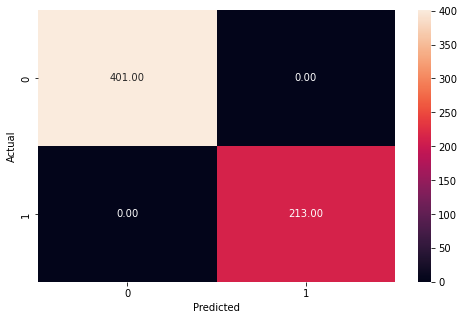

In [14]:
#Predict for train set
y_pred_train = df.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

## Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        99
           1       0.58      0.56      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



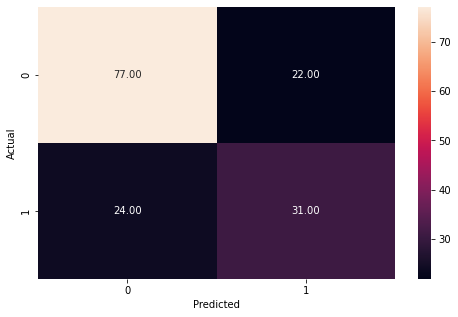

In [16]:
# Checking the performance on the test dataset
y_pred_test = df.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [17]:
df_test = model_performance_classification(df,X_test,y_test)
df_test

,Precision,Recall,Accuracy
0,0.673641,0.670707,0.701299


### The Decision Tree gives a 100% score for the train data set, i.e., the Decision Tree is overfitting the training data.
### The recall and precision scores for the test set are low- 56% and 58%
### The average recall and precision are 67% 
### The decision tree performance is poor and gives lower scores than the evaluation criteria and the regression model

## Decision Tree - Hyperparameter Tuning
using GridSearchCV for Hyperparameter tuning on the model# 

In [21]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
               'max_depth': [4],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=10, random_state=1)

## Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       401
           1       0.56      0.92      0.69       213

    accuracy                           0.72       614
   macro avg       0.74      0.76      0.71       614
weighted avg       0.80      0.72      0.72       614



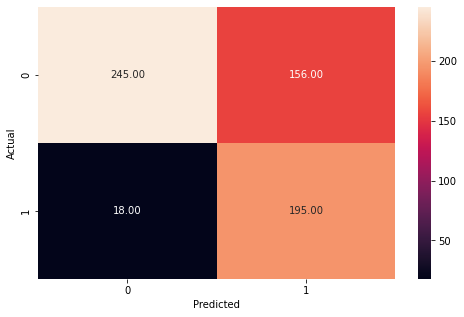

In [23]:
#Predict for train set
y_pred_train = dtree_estimator.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

## Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        99
           1       0.54      0.85      0.66        55

    accuracy                           0.69       154
   macro avg       0.71      0.73      0.69       154
weighted avg       0.76      0.69      0.69       154



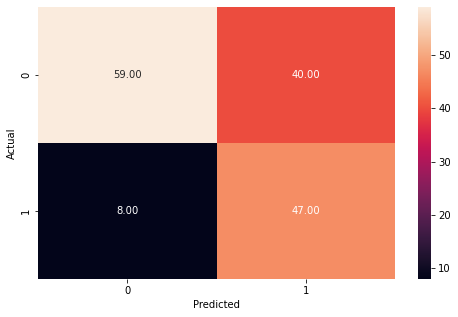

In [24]:
# Checking the performance on the test dataset
y_pred_test = dtree_estimator.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [26]:
dtree_estimator = model_performance_classification(dtree_estimator,X_test,y_test)
dtree_estimator

,Precision,Recall,Accuracy
0,0.710413,0.725253,0.688312


### The tuned decision tree is not overfitting the train data set
### The recall score in the test set has increased in the tuned model- 85% compared to 55%
### The precision is almost the same.
### The average recall and precision are reasonable compared to the default parameter model
### The recall and precision scores are good and pass the evaluation criteria